# 모델과 파라미터 찾기(배깅,부스팅)

## 라이브러리 로드

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

## 데이터셋 로드

In [15]:
df = pd.read_csv('data/diabetes_feature.csv')
df.shape

(768, 16)

In [16]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_mid,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,0.848324,72,35,0,33.6,0.468492,50,1,False,False,True,False,169.5,5.138735,False
1,1,-1.123396,66,29,0,26.6,-0.365061,31,0,False,False,True,False,102.5,4.639572,True
2,8,1.943724,64,0,0,23.3,0.604397,32,1,True,False,True,False,169.5,5.138735,False
3,1,-0.998208,66,23,94,28.1,-0.920763,21,0,False,True,False,False,94.0,4.553877,True
4,0,0.504055,40,35,168,43.1,5.484909,33,1,False,False,True,False,168.0,5.129899,False


## 학습과 예측에 사용할 데이터셋 만들기

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_mid', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [18]:
# feature
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [19]:
y = df['Outcome']
y.shape

(768,)

In [20]:
# 사이킷런에서 제공하는 model_selection의 train_test_split으로 만든다.
from sklearn.model_selection import train_test_split

# 데이터 랜덤하게 섞여서 나뉜다.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# train 세트의 문제와 정답의 데이터 수를 확인하자.
X_train.shape, y_train.shape

((614, 9), (614,))

In [22]:
# test 세트의 문제와 정답의 데이터 수를 확인하자.
X_test.shape, y_test.shape

((154, 9), (154,))

## 학습과 예측하기

[결정트리 학습](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)

앙상블 방법이라고 불리는 아래와 같은 기법들은 입력된 자료로부터 한 개 이상의 결정 트리를 생성한다. 초기 앙상블 방법인 `배깅(Bootstrap aggregating)` 결정 트리는 `반복적으로 교체 과정을 수행`하는 것과 함께 `훈련 데이터를 재 샘플링`하고, 합의 예측을 위한 트리를 선택하는 것으로 다수의 의사 결정 트리를 생성한다.

- 시각화하기 편하다.

[배깅](https://ko.wikipedia.org/wiki/%EB%B0%B0%EA%B9%85)

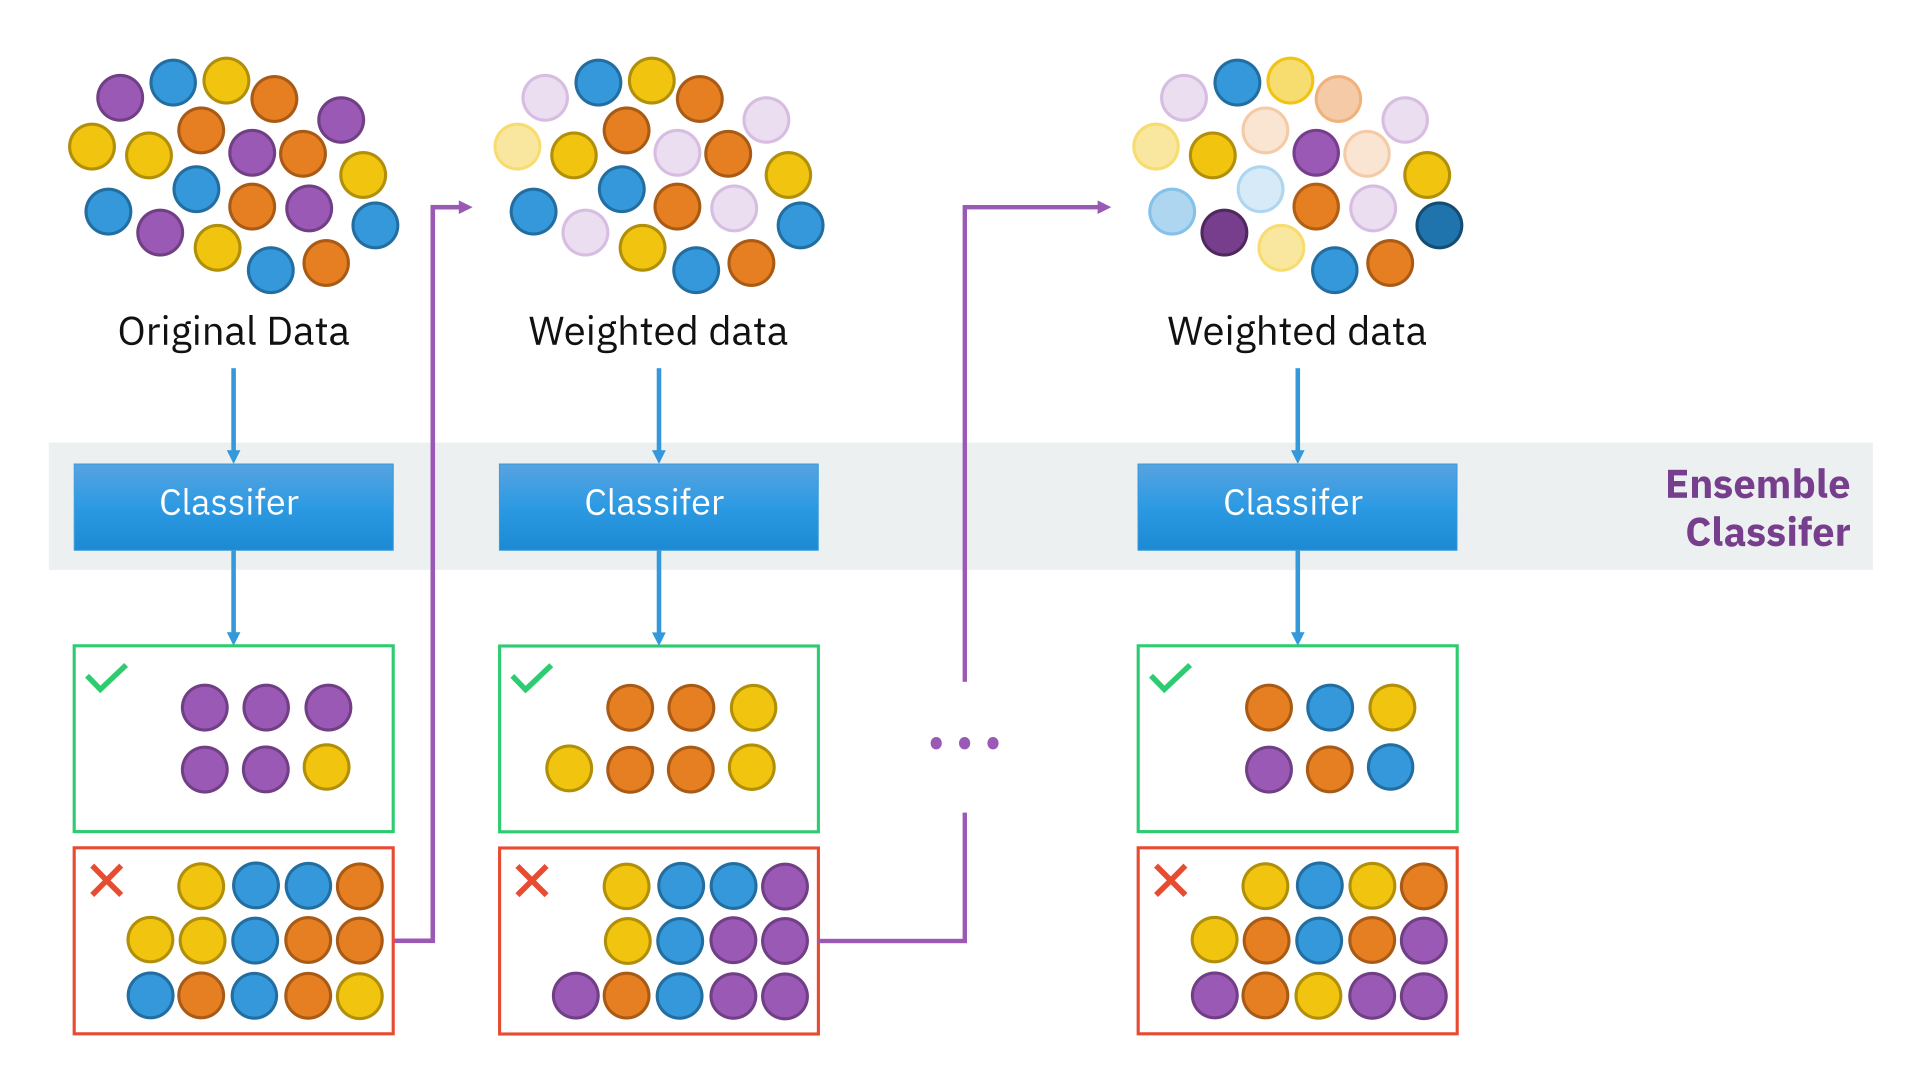

결정 트리 학습법이나 랜덤 포레스트에만 적용되는 것이 일반적이기는 하나, 그 외의 다른 방법들과 함께 사용할 수 있다.

- 트리 개수가 많아서 시각화하기 어렵다.

[부스팅](https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/)

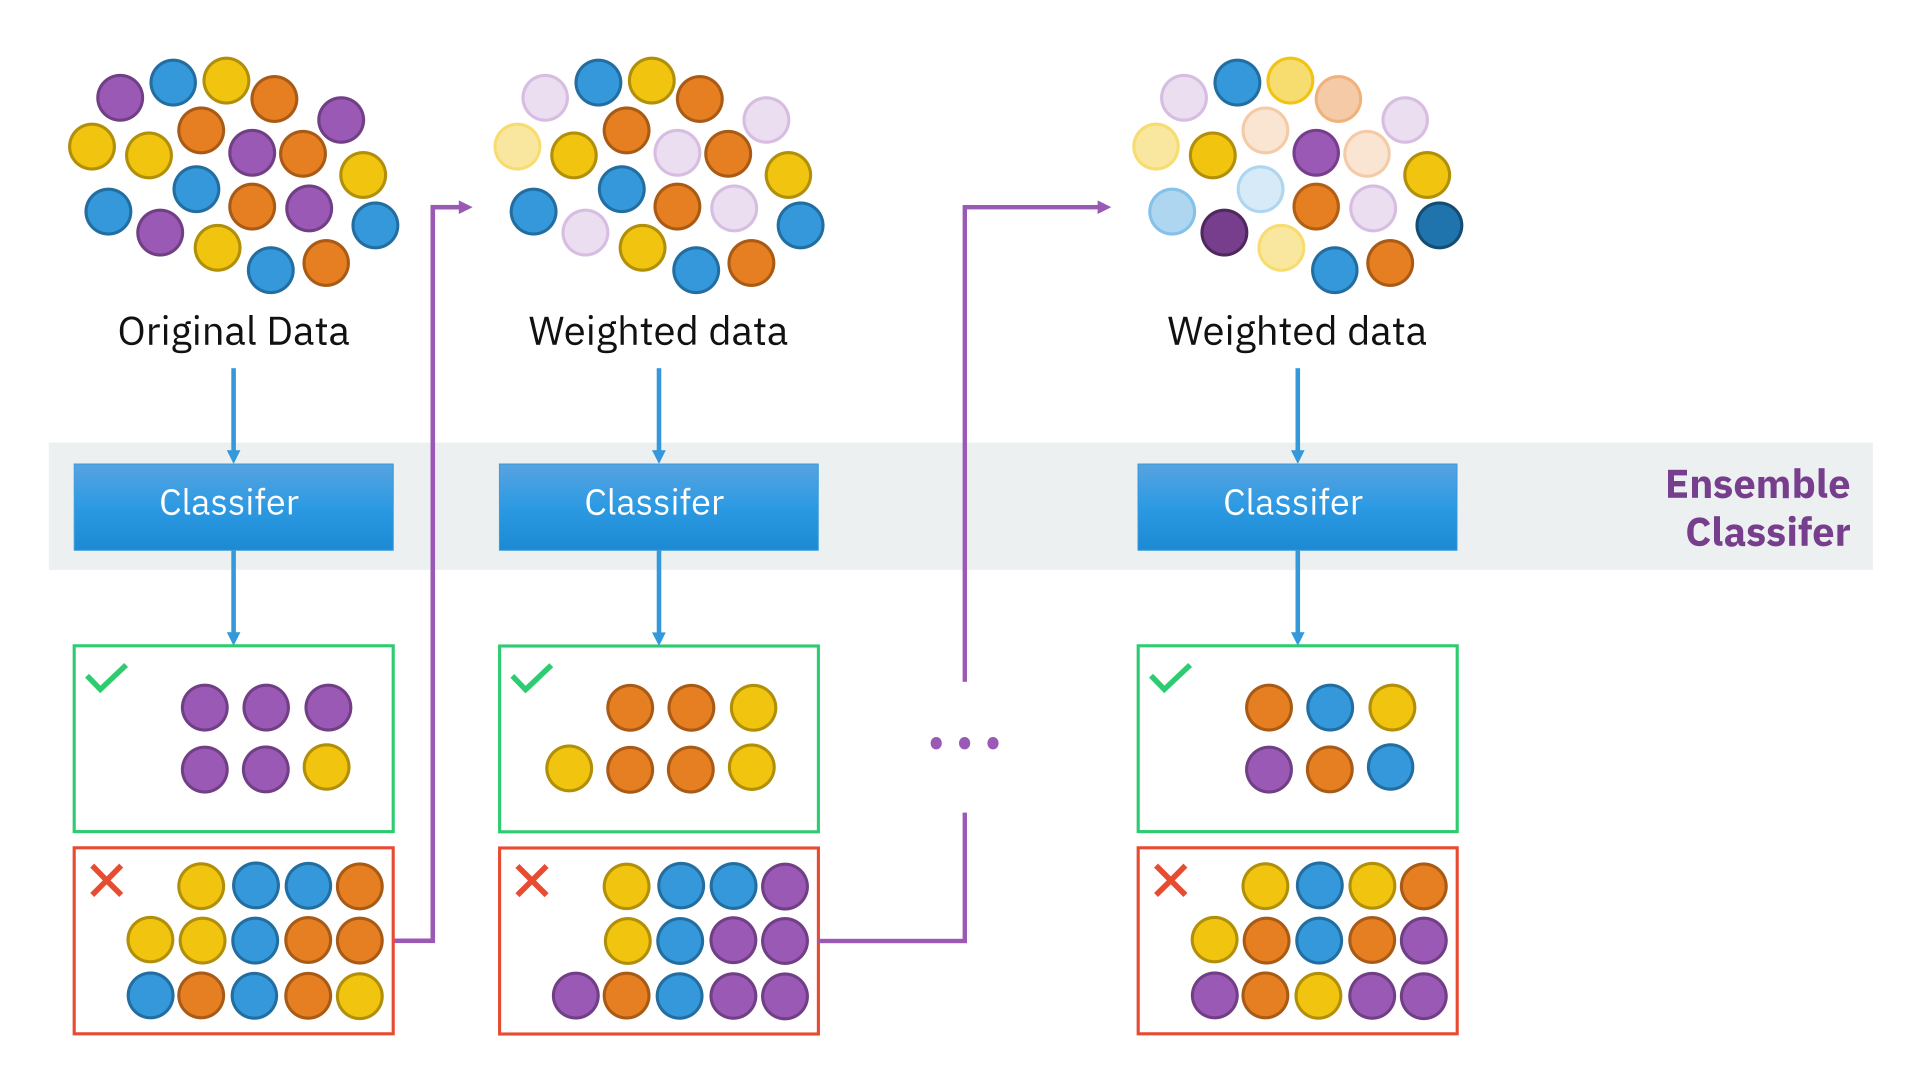

샘플링에 가중치를 부여한다.

### 결정 트리

In [23]:
model = DecisionTreeClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

In [24]:
# 학습을 시킨다.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# 예측 결과를 y_pred에 담는다.
y_pred = model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
# # 다르게 예측한 갯수를 구해서 diff_count에 할당한다.
# diff_count = sum(y_pred != y_test)
# diff_count

28

In [30]:
# # accuracy score 구하기
# accuracy_score(y_test, y_pred)

0.8181818181818182

### Bagging - 랜덤 포레스트

In [34]:
# n_estimators=100 : 트리 100개
model = RandomForestClassifier(random_state=42)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [35]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
model.feature_importances_

array([0.14724421, 0.04737896, 0.07125703, 0.0915895 , 0.0647634 ,
       0.10255183, 0.01102453, 0.43133793, 0.03285262])

In [41]:
feature_names = X_train.columns.tolist()

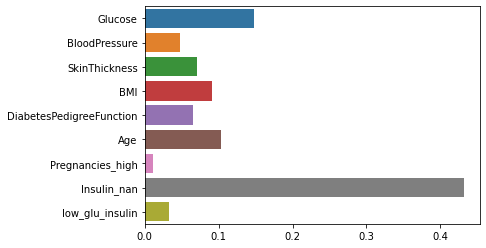

In [42]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [36]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [37]:
diff_count = sum(y_pred != y_test)
diff_count

20

In [38]:
accuracy_score(y_test, y_pred)

0.8701298701298701

### Boosting - 그라디언트 부스팅

In [79]:
model = GradientBoostingClassifier(random_state=42)
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [80]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [81]:
feature_names = X_train.columns.tolist()

In [82]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.48098777e-02, 1.56708089e-04, 6.62189591e-01,
       0.00000000e+00])

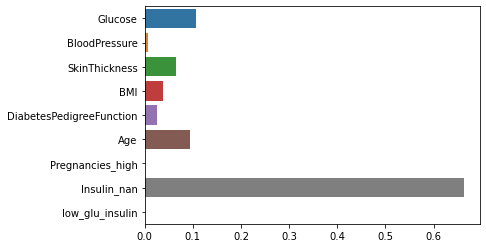

In [83]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [84]:
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [85]:
(y_pred!=y_test).sum()

24

In [86]:
accuracy_score(y_test, y_pred)

0.8441558441558441

Accuracy score
- DT : 0.818
- RT : 0.870
- GBL : 0.844

## 여러 개의 알고리즘 비교

### Radnom Search

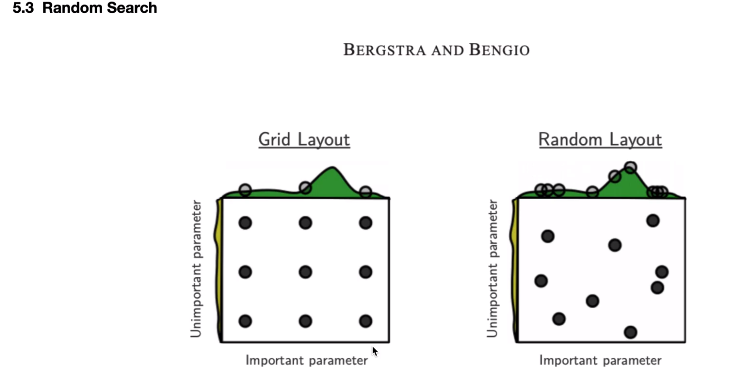

https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

In [118]:
# 여러 알고리즘 
estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]

estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [119]:
[(type(i),i.get_params()) for i in estimators]

[(sklearn.tree._classes.DecisionTreeClassifier,
  {'ccp_alpha': 0.0,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': None,
   'max_leaf_nodes': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'presort': 'deprecated',
   'random_state': 42,
   'splitter': 'best'}),
 (sklearn.ensemble._forest.RandomForestClassifier,
  {'bootstrap': True,
   'ccp_alpha': 0.0,
   'class_weight': None,
   'criterion': 'gini',
   'max_depth': None,
   'max_features': 'auto',
   'max_leaf_nodes': None,
   'max_samples': None,
   'min_impurity_decrease': 0.0,
   'min_impurity_split': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'min_weight_fraction_leaf': 0.0,
   'n_estimators': 100,
   'n_jobs': None,
   'oob_score': False,
   'random_state': 42,
   'verbose': 0,
   'warm_start': False}),
 (sklearn.ensemble._gb.GradientBoostingClassifier,


In [120]:
max_depth = np.random.randint(2,20,10)
max_depth

array([ 9,  6, 19, 13, 10, 10,  9, 14, 11,  4])

In [121]:
import random

max_depth = random.sample(range(2,20),10)
max_depth

[7, 17, 14, 8, 6, 11, 10, 13, 18, 16]

In [122]:
max_features = np.random.uniform(0.3, 1.0,10)
max_features

array([0.3103938 , 0.65985331, 0.40782122, 0.92631332, 0.7600176 ,
       0.36099323, 0.81431271, 0.36039777, 0.85140729, 0.63787228])

In [128]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    print(estimator.__class__.__name__)
    results.append(result)

print(results)

DecisionTreeClassifier
RandomForestClassifier
GradientBoostingClassifier
[['DecisionTreeClassifier'], ['RandomForestClassifier'], ['GradientBoostingClassifier']]


In [141]:
param_distributions['n_estimators'] = random.sample(range(100,1000),10)
param_distributions

{'max_depth': array([ 5,  8, 18,  2, 11, 15,  9,  7,  6,  8]),
 'max_features': array([0.53035911, 0.96906972, 0.66356125, 0.66644639, 0.83744699,
        0.47975684, 0.5330254 , 0.94311984, 0.88488594, 0.31163336]),
 'n_estimators': [953, 139, 228, 222, 329, 935, 150, 464, 519, 674]}

In [145]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = random.sample(range(2,20),10)
max_features = np.random.uniform(0.5, 1.0,10)

param_distributions = {'max_depth':max_depth, 'max_features':max_features}

results = []
for estimator in estimators:
    result = []
    print(estimator.__class__.__name__)
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions['n_estimators'] = random.sample(range(100,200),10)
    
    clf = RandomizedSearchCV(estimator,
                             param_distributions=param_distributions,
                             n_iter=100,
                             verbose=1, # 로그 출력
                             n_jobs=-1,
                             scoring='accuracy', 
                             cv=5) # 하이퍼 파라미터 당 다섯 번 학습
    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

DecisionTreeClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


RandomForestClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


GradientBoostingClassifier
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


In [147]:
df = pd.DataFrame(results, columns=['estimator','best_params','train_score','test_score', 'cv_result'])
df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.5827885108179789, 'max_dept...",0.868119,0.837662,"{'mean_fit_time': [0.010993862152099609, 0.015..."
1,RandomForestClassifier,"{'n_estimators': 180, 'max_features': 0.794389...",0.905584,0.844156,"{'mean_fit_time': [0.4875211238861084, 0.59386..."
2,GradientBoostingClassifier,"{'n_estimators': 199, 'max_features': 0.528703...",0.907210,0.863636,"{'mean_fit_time': [1.7836080551147462, 0.80584..."


In [149]:
pd.DataFrame(df.loc[1,'cv_result']).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,0.672917,0.016834,0.039777,0.002399,180,0.79439,7,"{'n_estimators': 180, 'max_features': 0.794389...",0.878049,0.951220,0.869919,0.894309,0.934426,0.905584,0.031849,1
52,0.697906,0.053730,0.036481,0.005404,163,0.848916,7,"{'n_estimators': 163, 'max_features': 0.848916...",0.886179,0.951220,0.869919,0.886179,0.934426,0.905584,0.031431,1
41,0.901291,0.054763,0.052370,0.016185,194,0.79439,7,"{'n_estimators': 194, 'max_features': 0.794389...",0.878049,0.943089,0.869919,0.902439,0.934426,0.905584,0.029253,1
6,0.432156,0.020103,0.025785,0.002134,120,0.603084,11,"{'n_estimators': 120, 'max_features': 0.603084...",0.886179,0.934959,0.853659,0.894309,0.950820,0.903985,0.034918,4
40,0.617453,0.027295,0.030782,0.003368,131,0.896385,12,"{'n_estimators': 131, 'max_features': 0.896384...",0.878049,0.951220,0.861789,0.902439,0.926230,0.903945,0.032192,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.686516,0.035313,0.039977,0.008241,163,0.79439,12,"{'n_estimators': 163, 'max_features': 0.794389...",0.869919,0.934959,0.853659,0.869919,0.926230,0.890937,0.033036,95
68,0.421060,0.019200,0.024386,0.001624,108,0.848916,17,"{'n_estimators': 108, 'max_features': 0.848916...",0.878049,0.926829,0.853659,0.869919,0.926230,0.890937,0.030104,95
42,0.530598,0.026484,0.037579,0.020429,108,0.848916,12,"{'n_estimators': 108, 'max_features': 0.848916...",0.878049,0.926829,0.853659,0.869919,0.926230,0.890937,0.030104,95
39,0.718189,0.006941,0.038978,0.007425,163,0.787805,18,"{'n_estimators': 163, 'max_features': 0.787805...",0.869919,0.934959,0.853659,0.869919,0.926230,0.890937,0.033036,95


좋은 성능이 나오는 구간으로 계속 iteration을 돌릴 필요가 있다.

하이퍼 파라미터 튜닝을 여러 번 할수록 좋은 성능을 얻을 수 있다.